In [42]:
apikey='H9iod5aNrd3jK2jF2XdK9ahATJMKg5khSVmnmk4m2JkbSN96P0qPj2Yhru90zPHe'
secret='L7DoVVoLGwCojEtHnirsPifL55TY0BVqhdtIuaTFhFLIyYhjkpvih^MrSwunp5kF8'

In [44]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np     
import datetime 

In [45]:
client=Client(apikey,secret)  

In [46]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815^",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]
#client.get_historical_klines??

In [102]:
historical = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'17 Aug 2017')# parameters:(symbol, interval, date_from)
ltc = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'1 Feb,2023')# parameters:(symbol, interval, date_from)
historical

[[1513123200000,
  '272.00000000',
  '330.00000000',
  '260.00000000',
  '290.01000000',
  '9565.16019000',
  1513209599999,
  '2770877.00276700',
  4709,
  '3930.49388000',
  '1146169.97119300',
  '0'],
 [1513209600000,
  '290.01000000',
  '302.72000000',
  '252.00000000',
  '272.40000000',
  '9631.98382000',
  1513295999999,
  '2666481.14992110',
  5753,
  '4291.36257000',
  '1196920.22454860',
  '0'],
 [1513296000000,
  '272.40000000',
  '314.21000000',
  '239.99000000',
  '294.00000000',
  '16579.78235000',
  1513382399999,
  '4658823.65081600',
  7826,
  '9339.39791000',
  '2638328.96365740',
  '0'],
 [1513382400000,
  '294.00000000',
  '305.00000000',
  '285.00000000',
  '293.97000000',
  '9102.10005000',
  1513468799999,
  '2674491.78527750',
  6151,
  '3601.16255000',
  '1062827.03643380',
  '0'],
 [1513468800000,
  '293.01000000',
  '328.80000000',
  '290.00000000',
  '311.40000000',
  '14682.26118000',
  1513555199999,
  '4618546.96648190',
  10383,
  '8280.03170000',
  '2602

In [103]:
hist_df=pd.DataFrame(historical)
ltc_df=pd.DataFrame(ltc)
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1513123200000,272.00000000,330.00000000,260.00000000,290.01000000,9565.16019000,1513209599999,2770877.00276700,4709,3930.49388000,1146169.97119300,0
1,1513209600000,290.01000000,302.72000000,252.00000000,272.40000000,9631.98382000,1513295999999,2666481.14992110,5753,4291.36257000,1196920.22454860,0
2,1513296000000,272.40000000,314.21000000,239.99000000,294.00000000,16579.78235000,1513382399999,4658823.65081600,7826,9339.39791000,2638328.96365740,0
3,1513382400000,294.00000000,305.00000000,285.00000000,293.97000000,9102.10005000,1513468799999,2674491.78527750,6151,3601.16255000,1062827.03643380,0
4,1513468800000,293.01000000,328.80000000,290.00000000,311.40000000,14682.26118000,1513555199999,4618546.96648190,10383,8280.03170000,2602599.78754250,0


In [104]:
ltc_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1513123200000,272.00000000,330.00000000,260.00000000,290.01000000,9565.16019000,1513209599999,2770877.00276700,4709,3930.49388000,1146169.97119300,0
1,1513209600000,290.01000000,302.72000000,252.00000000,272.40000000,9631.98382000,1513295999999,2666481.14992110,5753,4291.36257000,1196920.22454860,0
2,1513296000000,272.40000000,314.21000000,239.99000000,294.00000000,16579.78235000,1513382399999,4658823.65081600,7826,9339.39791000,2638328.96365740,0
3,1513382400000,294.00000000,305.00000000,285.00000000,293.97000000,9102.10005000,1513468799999,2674491.78527750,6151,3601.16255000,1062827.03643380,0
4,1513468800000,293.01000000,328.80000000,290.00000000,311.40000000,14682.26118000,1513555199999,4618546.96648190,10383,8280.03170000,2602599.78754250,0


In [105]:
ltc_df.dtypes #int64 + objects (which are strings) >> preprocessing

date                   int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [106]:
hist_df.head()
type(hist_df.date[0])

numpy.int64

In [107]:
#convert from Unix timestamps to date
hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
hist_df['Close Time']= pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [108]:
#convert from Unix timestamps to date
ltc_df['date']= pd.to_datetime(ltc_df['date']/1000, unit='s')
ltc_df['Close Time']= pd.to_datetime(ltc_df['Close Time']/1000, unit='s')
ltc_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [109]:
ltc_df.head() #notice open time and close time 

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09000000,102.53000000,93.73000000,100.33000000,1324424.13100000,2023-02-01 23:59:59.999000064,128437281.94675000,285177,718617.26900000,69722529.33204000,0
1,2023-02-02,100.32000000,102.34000000,97.92000000,98.64000000,730534.05500000,2023-02-02 23:59:59.999000064,73204584.65212000,153947,352264.43000000,35315090.28698000,0
2,2023-02-03,98.64000000,100.76000000,97.48000000,99.86000000,568938.08700000,2023-02-03 23:59:59.999000064,56316609.24040000,121313,274062.69300000,27135940.65284000,0
3,2023-02-04,99.86000000,101.36000000,98.23000000,98.51000000,357081.56100000,2023-02-04 23:59:59.999000064,35530515.18392000,85103,171189.51100000,17039515.43394000,0
4,2023-02-05,98.51000000,98.89000000,94.86000000,96.63000000,417682.27500000,2023-02-05 23:59:59.999000064,40576721.44145000,98353,192781.02800000,18742356.41643000,0


In [110]:
ltc_df.date=ltc_df.date.apply(lambda x: x.date())
hist_df.date=hist_df.date.apply(lambda x: x.date())

In [111]:
numeric_columns=['Open','High','Low','Close','Volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df[numeric_columns]=ltc_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09,102.53,93.73,100.33,1324424.131,2023-02-01 23:59:59.999000064,1.284373e+08,285177,718617.269,6.972253e+07,0
1,2023-02-02,100.32,102.34,97.92,98.64,730534.055,2023-02-02 23:59:59.999000064,7.320458e+07,153947,352264.430,3.531509e+07,0
2,2023-02-03,98.64,100.76,97.48,99.86,568938.087,2023-02-03 23:59:59.999000064,5.631661e+07,121313,274062.693,2.713594e+07,0
3,2023-02-04,99.86,101.36,98.23,98.51,357081.561,2023-02-04 23:59:59.999000064,3.553052e+07,85103,171189.511,1.703952e+07,0
4,2023-02-05,98.51,98.89,94.86,96.63,417682.275,2023-02-05 23:59:59.999000064,4.057672e+07,98353,192781.028,1.874236e+07,0


In [112]:
ltc_df.dtypes

date                          object
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [113]:
ltc_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,101.000000,101.000000,101.000000,101.000000,1.010000e+02,1.010000e+02,101.000000,101.000000,1.010000e+02
mean,90.393762,92.666436,87.570594,90.245446,7.254840e+05,6.428177e+07,156749.316832,353630.619663,3.135586e+07
std,6.728321,6.528388,7.174859,6.812676,3.723337e+05,2.969407e+07,70055.769649,184918.433492,1.486124e+07
min,69.210000,73.830000,65.000000,69.210000,1.990931e+05,1.799747e+07,64741.000000,93402.364000,8.444875e+06
25%,87.250000,89.030000,84.210000,87.000000,4.347882e+05,4.145460e+07,105754.000000,220777.738000,2.020751e+07
50%,91.050000,93.960000,89.070000,91.030000,6.524118e+05,5.958082e+07,143088.000000,315532.600000,2.956677e+07
75%,94.290000,96.280000,92.630000,94.280000,8.818607e+05,7.683153e+07,187072.000000,406463.947000,3.717713e+07
max,102.830000,105.710000,98.930000,102.820000,1.958666e+06,1.688043e+08,394369.000000,962102.168000,8.630967e+07


In [114]:
ltc_df.describe(include='object')

,date,Ignore
count,101,101
unique,101,1
top,2023-02-01,0
freq,1,101


In [115]:
ltc_df.describe(include='datetime')

C:\Users\Layan\AppData\Local\Temp\ipykernel_8832\261289646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ltc_df.describe(include='datetime')


,Close Time
count,101
unique,101
top,2023-02-01 23:59:59.999000064
freq,1
first,2023-02-01 23:59:59.999000064
last,2023-05-12 23:59:59.999000064


In [116]:
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                101 non-null    object        
 1   Open                101 non-null    float64       
 2   High                101 non-null    float64       
 3   Low                 101 non-null    float64       
 4   Close               101 non-null    float64       
 5   Volume              101 non-null    float64       
 6   Close Time          101 non-null    datetime64[ns]
 7   Quote Asset Volume  101 non-null    float64       
 8   Number of Trades    101 non-null    int64         
 9   TB Base Volume      101 non-null    float64       
 10  TB Quote Volume     101 non-null    float64       
 11  Ignore              101 non-null    object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 9.6+ KB


In [117]:
ltc_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2023-02-01,94.09,102.53,93.73,100.33,1324424.131,2023-02-01 23:59:59.999000064,1.284373e+08,285177,718617.269,6.972253e+07,0
1,2023-02-02,100.32,102.34,97.92,98.64,730534.055,2023-02-02 23:59:59.999000064,7.320458e+07,153947,352264.430,3.531509e+07,0
2,2023-02-03,98.64,100.76,97.48,99.86,568938.087,2023-02-03 23:59:59.999000064,5.631661e+07,121313,274062.693,2.713594e+07,0
3,2023-02-04,99.86,101.36,98.23,98.51,357081.561,2023-02-04 23:59:59.999000064,3.553052e+07,85103,171189.511,1.703952e+07,0
4,2023-02-05,98.51,98.89,94.86,96.63,417682.275,2023-02-05 23:59:59.999000064,4.057672e+07,98353,192781.028,1.874236e+07,0


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Layan\AppData\Local\Temp\ipykernel_8832\2087155994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = ltc_df.corr()


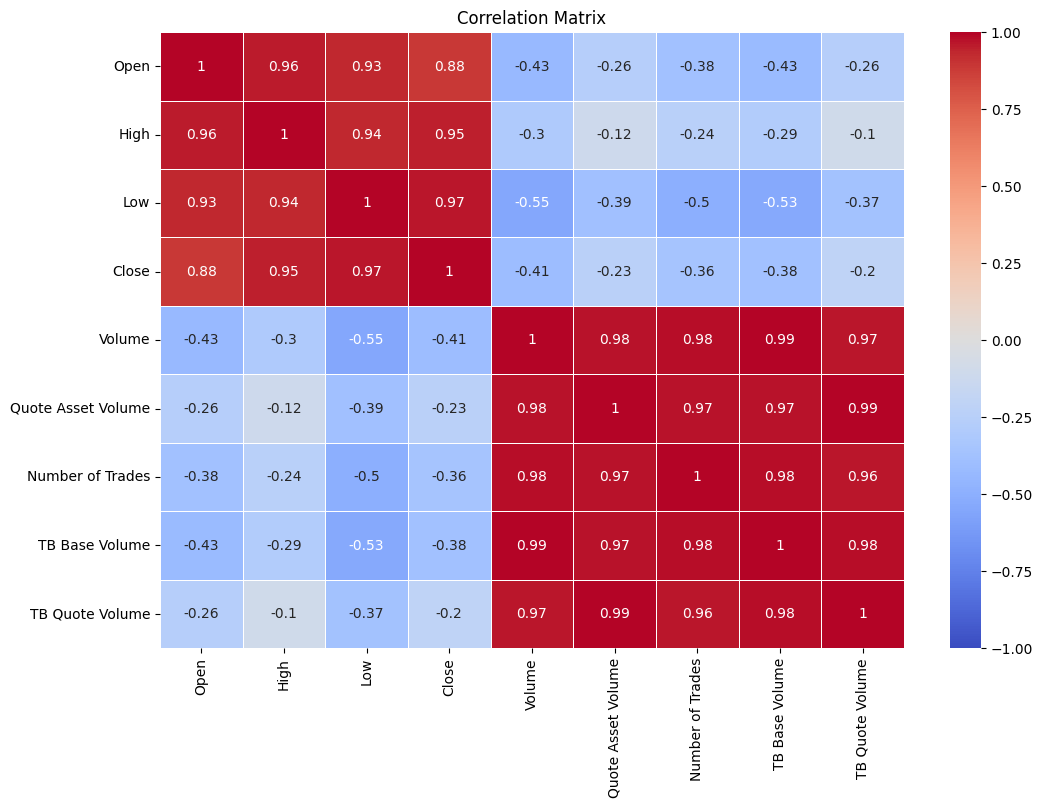

In [119]:
correlations = ltc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [120]:
data_csv=hist_df.drop(['Quote Asset Volume','TB Quote Volume','Number of Trades','TB Base Volume','Close Time','Ignore'],axis=1)
data_csv.to_csv('ltc_prediction_data.csv')
data_csv

,date,Open,High,Low,Close,Volume
0,2017-12-13,272.00,330.00,260.00,290.01,9.565160e+03
1,2017-12-14,290.01,302.72,252.00,272.40,9.631984e+03
2,2017-12-15,272.40,314.21,239.99,294.00,1.657978e+04
3,2017-12-16,294.00,305.00,285.00,293.97,9.102100e+03
4,2017-12-17,293.01,328.80,290.00,311.40,1.468226e+04
...,...,...,...,...,...,...
1972,2023-05-08,83.41,85.25,75.20,77.71,1.093958e+06
1973,2023-05-09,77.72,80.10,77.31,79.90,6.524118e+05
1974,2023-05-10,79.91,82.04,77.12,80.93,8.627470e+05
1975,2023-05-11,80.93,81.97,78.37,80.88,7.878755e+05


In [121]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1977 non-null   object 
 1   Open    1977 non-null   float64
 2   High    1977 non-null   float64
 3   Low     1977 non-null   float64
 4   Close   1977 non-null   float64
 5   Volume  1977 non-null   float64
dtypes: float64(5), object(1)
memory usage: 92.8+ KB


# Blockchain Data 

In [93]:
import requests

url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day'
params = {'fsym': 'LTC', 'limit': 1825, 'api_key': 'e6a9a2c327eba343b8ba318f86017574f6d9bdb9d5d13ae643531bda926f5e32'}

response = requests.get(url, params=params)

if response.status_code != 200:
    print(f'Request failed with status code {response.status_code}.')
else:
    data = response.json()['Data']
    print(data)


{'Aggregated': False, 'TimeFrom': 1526169600, 'TimeTo': 1683849600, 'Data': [{'id': 3808, 'symbol': 'LTC', 'time': 1526169600, 'zero_balance_addresses_all_time': 27140305, 'unique_addresses_all_time': 30024695, 'new_addresses': 36491, 'active_addresses': 99756, 'transaction_count': 27702, 'transaction_count_all_time': 24263295, 'large_transaction_count': 284, 'average_transaction_value': 80.9362597894935, 'block_height': 1421082, 'hashrate': 313.036782028766, 'difficulty': 9976814.57792296, 'block_time': 136.885167464115, 'block_size': 26028, 'current_supply': 56525133.2334715}, {'id': 3808, 'symbol': 'LTC', 'time': 1526256000, 'zero_balance_addresses_all_time': 27177510, 'unique_addresses_all_time': 30067934, 'new_addresses': 43239, 'active_addresses': 118459, 'transaction_count': 32663, 'transaction_count_all_time': 24295958, 'large_transaction_count': 519, 'average_transaction_value': 99.1675931393365, 'block_height': 1421652, 'hashrate': 292.212421296013, 'difficulty': 10267458.366

In [94]:
import pandas as pd

df = pd.DataFrame(data)
print(df.head())

   Aggregated    TimeFrom      TimeTo  \
0       False  1526169600  1683849600   
1       False  1526169600  1683849600   
2       False  1526169600  1683849600   
3       False  1526169600  1683849600   
4       False  1526169600  1683849600   

                                                Data  
0  {'id': 3808, 'symbol': 'LTC', 'time': 15261696...  
1  {'id': 3808, 'symbol': 'LTC', 'time': 15262560...  
2  {'id': 3808, 'symbol': 'LTC', 'time': 15263424...  
3  {'id': 3808, 'symbol': 'LTC', 'time': 15264288...  
4  {'id': 3808, 'symbol': 'LTC', 'time': 15265152...  


In [95]:
data_column = df['Data']
print(data_column)

0       {'id': 3808, 'symbol': 'LTC', 'time': 15261696...
1       {'id': 3808, 'symbol': 'LTC', 'time': 15262560...
2       {'id': 3808, 'symbol': 'LTC', 'time': 15263424...
3       {'id': 3808, 'symbol': 'LTC', 'time': 15264288...
4       {'id': 3808, 'symbol': 'LTC', 'time': 15265152...
                              ...                        
1819    {'id': 3808, 'symbol': 'LTC', 'time': 16833312...
1820    {'id': 3808, 'symbol': 'LTC', 'time': 16834176...
1821    {'id': 3808, 'symbol': 'LTC', 'time': 16835040...
1822    {'id': 3808, 'symbol': 'LTC', 'time': 16835904...
1823    {'id': 3808, 'symbol': 'LTC', 'time': 16836768...
Name: Data, Length: 1824, dtype: object


In [96]:
import pandas as pd

# assuming your original dataframe is called 'df'
blockchain_ltc = pd.json_normalize(df['Data'])
# now df contains a flat dataframe with the columns from the dictionary in the 'Data' column
print(blockchain_ltc.head())

     id symbol        time  zero_balance_addresses_all_time  \
0  3808    LTC  1526169600                         27140305   
1  3808    LTC  1526256000                         27177510   
2  3808    LTC  1526342400                         27212065   
3  3808    LTC  1526428800                         27248103   
4  3808    LTC  1526515200                         27283385   

   unique_addresses_all_time  new_addresses  active_addresses  \
0                   30024695          36491             99756   
1                   30067934          43239            118459   
2                   30110098          42164            115177   
3                   30151999          41901            114405   
4                   30192770          40771            113345   

   transaction_count  transaction_count_all_time  large_transaction_count  \
0              27702                    24263295                      284   
1              32663                    24295958                      519   

In [97]:
#hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
blockchain_ltc['time'] = pd.to_datetime(blockchain_ltc['time'], unit='s')

In [98]:
blockchain_ltc = blockchain_ltc.rename(columns={'time': 'date'})

In [99]:
blockchain_ltc.date=blockchain_ltc.date.apply(lambda x: x.date())

In [100]:
blockchain_ltc.head()

,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
0,3808,LTC,2018-05-13,27140305,30024695,36491,99756,27702,24263295,284,80.936260,1421082,313.036782,9.976815e+06,136.885167,26028,5.652513e+07
1,3808,LTC,2018-05-14,27177510,30067934,43239,118459,32663,24295958,519,99.167593,1421652,292.212421,1.026746e+07,150.912127,37054,5.653938e+07
2,3808,LTC,2018-05-15,27212065,30110098,42164,115177,32201,24328159,477,151.673695,1422223,297.500801,1.042096e+07,150.445614,33859,5.655366e+07
3,3808,LTC,2018-05-16,27248103,30151999,41901,114405,32030,24360189,384,142.268303,1422839,319.597568,1.042096e+07,140.043902,31292,5.656906e+07
4,3808,LTC,2018-05-17,27283385,30192770,40771,113345,31651,24391840,446,102.292331,1423427,305.735777,1.046912e+07,147.069847,32887,5.658376e+07


In [101]:
blockchain_ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1824 non-null   int64  
 1   symbol                           1824 non-null   object 
 2   date                             1824 non-null   object 
 3   zero_balance_addresses_all_time  1824 non-null   int64  
 4   unique_addresses_all_time        1824 non-null   int64  
 5   new_addresses                    1824 non-null   int64  
 6   active_addresses                 1824 non-null   int64  
 7   transaction_count                1824 non-null   int64  
 8   transaction_count_all_time       1824 non-null   int64  
 9   large_transaction_count          1824 non-null   int64  
 10  average_transaction_value        1824 non-null   float64
 11  block_height                     1824 non-null   int64  
 12  hashrate            

In [138]:
bc_df=blockchain_ltc[1500:]
historical_df=data_csv[1500:]
merged_df = pd.merge(bc_df, historical_df, on=['date'])

In [139]:
merged_df

,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,...,hashrate,difficulty,block_time,block_size,current_supply,Open,High,Low,Close,Volume
0,3808,LTC,2022-06-21,144891057,151229354,122540,258405,99087,119280935,6349,...,408.291119,1.344264e+07,141.408197,97349,7.055326e+07,52.76,55.71,51.86,53.52,1381554.785
1,3808,LTC,2022-06-22,145010081,151350222,120868,268928,96887,119377822,10905,...,374.437903,1.312015e+07,150.493892,102483,7.056124e+07,53.53,53.55,50.41,52.13,927893.846
2,3808,LTC,2022-06-23,145121596,151477496,127274,245086,104701,119482523,8912,...,432.818490,1.312015e+07,130.194570,86982,7.056949e+07,52.15,56.77,51.90,55.74,994973.172
3,3808,LTC,2022-06-24,145235269,151608384,130888,242541,109557,119592080,4353,...,424.796088,1.352466e+07,136.743222,92565,7.057737e+07,55.72,57.34,54.40,55.84,730614.764
4,3808,LTC,2022-06-25,145351129,151722282,113898,227872,94923,119687003,4347,...,412.365683,1.437774e+07,149.750436,99178,7.058456e+07,55.85,59.76,54.59,58.88,618227.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,3808,LTC,2023-05-06,187957966,195483100,495009,609076,407757,153027570,1624,...,688.152521,2.470386e+07,154.184258,249390,7.286921e+07,88.62,89.36,80.56,83.26,808799.894
320,3808,LTC,2023-05-07,188318527,195876634,393534,502381,355574,153383144,1815,...,638.145457,2.448948e+07,164.823755,334404,7.287564e+07,83.27,84.69,82.93,83.42,405461.481
321,3808,LTC,2023-05-08,188839571,196473654,597020,720624,526383,153909527,2079,...,646.147954,2.426070e+07,161.261682,434207,7.288209e+07,83.41,85.25,75.20,77.71,1093958.201
322,3808,LTC,2023-05-09,189418721,197153699,680045,816169,577235,154486762,2696,...,638.430554,2.426070e+07,163.211027,377073,7.288911e+07,77.72,80.10,77.31,79.90,652411.760


In [140]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               324 non-null    int64  
 1   symbol                           324 non-null    object 
 2   date                             324 non-null    object 
 3   zero_balance_addresses_all_time  324 non-null    int64  
 4   unique_addresses_all_time        324 non-null    int64  
 5   new_addresses                    324 non-null    int64  
 6   active_addresses                 324 non-null    int64  
 7   transaction_count                324 non-null    int64  
 8   transaction_count_all_time       324 non-null    int64  
 9   large_transaction_count          324 non-null    int64  
 10  average_transaction_value        324 non-null    float64
 11  block_height                     324 non-null    int64  
 12  hashrate              

In [141]:
merged_df=merged_df.drop(['symbol','id'],axis=1)

C:\Users\Layan\AppData\Local\Temp\ipykernel_8832\600487050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df.corr()


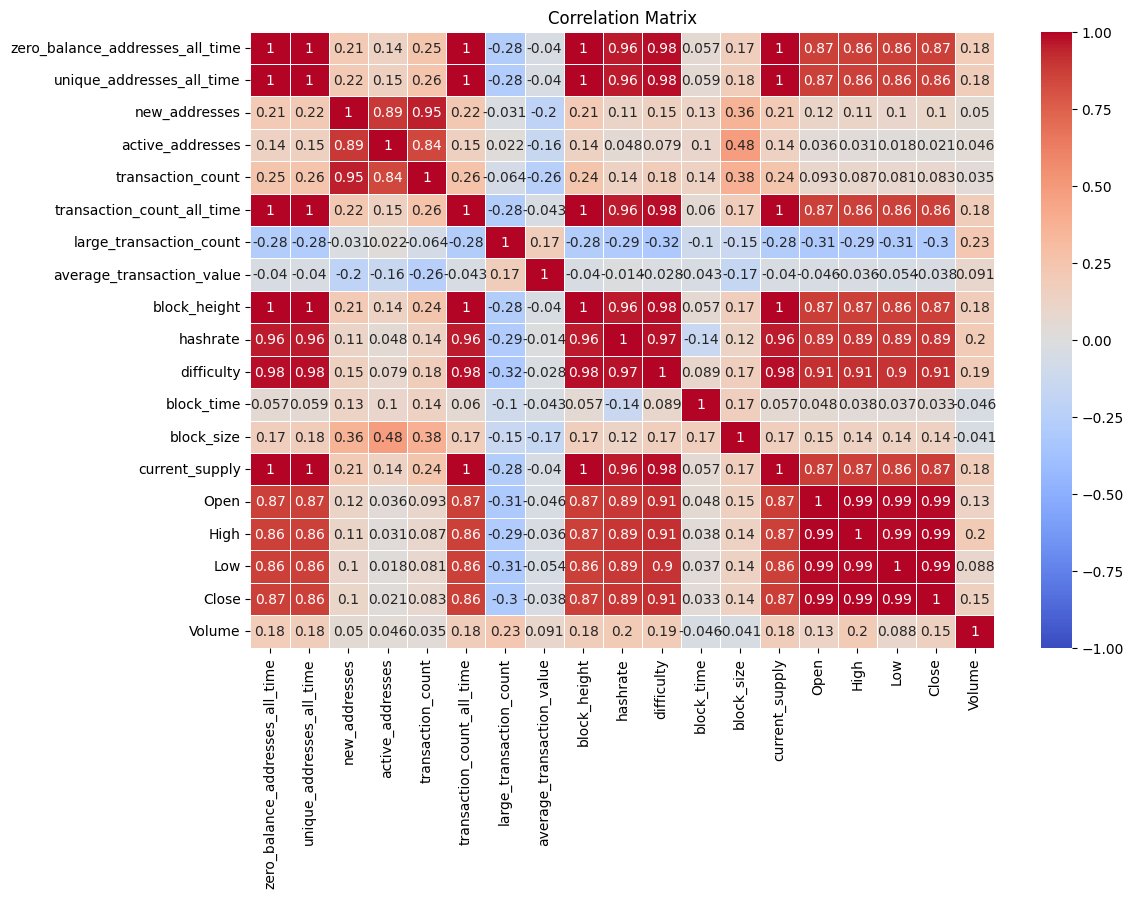

In [142]:
correlations = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [143]:
correlations['Open'].sort_values(ascending=False)

Open                               1.000000
High                               0.992912
Low                                0.992024
Close                              0.985700
difficulty                         0.907192
hashrate                           0.889188
current_supply                     0.869204
block_height                       0.868762
zero_balance_addresses_all_time    0.866928
unique_addresses_all_time          0.865132
transaction_count_all_time         0.865057
block_size                         0.149295
Volume                             0.129274
new_addresses                      0.115746
transaction_count                  0.093233
block_time                         0.047600
active_addresses                   0.036096
average_transaction_value         -0.045624
large_transaction_count           -0.309931
Name: Open, dtype: float64

In [41]:
csv_file=merged_df.to_csv('data_with_blockchain_ltc.csv')

# not included 

In [11]:
import requests
import pandas as pd
import datetime
url = 'https://api.blockchair.com/litecoin/stats/block_size'
params = {
    'timespan': '2years',
    'format': 'json'
}

response = requests.get(url,params=params)
print(response)
data = response.json()
df = pd.DataFrame(columns=['date','block_size'])

df

<Response [200]>


TypeError: 'str' object cannot be interpreted as an integer

In [18]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Calculate the start and end dates for the desired time range
end_date = datetime.now().date()
start_date = end_date - timedelta(days=365 * 5)

# Define the API endpoint and parameters
url = 'https://api.coingecko.com/api/v3/coins/litecoin/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '1825',  # 5 years
}

# Send a GET request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract the block size data from the response
timestamps = data['prices']
blocksize=data['block-size']

# Split the timestamps and prices into separate lists
dates = [datetime.fromtimestamp(timestamp[0] / 1000).date() for timestamp in timestamps]
block_sizes = [price[1] for price in timestamps]

# Create a DataFrame with the block size data
df = pd.DataFrame({'Date': dates, 'Block Size': block_sizes})

# Filter the DataFrame to include only the desired time range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Print the DataFrame
print(df)

ConnectionError: HTTPSConnectionPool(host='api.coingecko.com', port=443): Max retries exceeded with url: /api/v3/coins/litecoin/market_chart?vs_currency=usd&days=1825 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000024E32B65120>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
import requests

url = 'https://api.blockchair.com/litecoin/stats/block_size?time_start=6%20years%20ago&time_end=now'
response = requests.get(url)
data = response.json()
print(data)


In [6]:
import requests

# Set API endpoint
url = 'https://api.blockchair.com/litecoin/blocks'

# Set query parameters
params = {
    'q': 'time(2019-01-01..2021-01-01)',
    'a': 'guessed_miner,count()',
    's': 'count()(desc)'
}

# Make API request
response = requests.get(url, params=params)

# Print response data
print(response.json())


{'data': [{'guessed_miner': 'Unknown', 'count()': 152791}, {'guessed_miner': 'F2Pool', 'count()': 65579}, {'guessed_miner': 'ViaBTC', 'count()': 45868}, {'guessed_miner': 'litecoinpool.org', 'count()': 44405}, {'guessed_miner': 'AntPool', 'count()': 42096}, {'guessed_miner': 'BTC.com', 'count()': 34107}, {'guessed_miner': 'LTC.TOP', 'count()': 32673}, {'guessed_miner': 'DPOOL', 'count()': 2319}, {'guessed_miner': 'Sigmapool', 'count()': 1396}, {'guessed_miner': 'TBDice', 'count()': 671}], 'context': {'code': 200, 'source': 'A', 'limit': 10000, 'offset': 0, 'rows': 10, 'pre_rows': 10, 'total_rows': 10, 'state': 2471909, 'market_price_usd': 79.05, 'cache': {'live': True, 'duration': 120, 'since': '2023-05-11 18:09:56', 'until': '2023-05-11 18:11:56', 'time': None}, 'api': {'version': '2.0.95-ie', 'last_major_update': '2022-11-07 02:00:00', 'next_major_update': None, 'documentation': 'https://blockchair.com/api/docs', 'notice': 'Please note that on November 7th, 2022 public support for th

In [3]:
import requests
import json

# Define the API endpoint URL
url = 'https://api.blockchair.com/litecoin/blocks'

# Define the start and end times for the blockchain data
start_time = '2022-01-02'
end_time = '2023-05-10'

# Set the initial page number to 1
page_num = 1

# Set a flag to indicate when we've reached the end of the data
end_of_data = False

# Define an empty list to hold the block data
block_data = []

# Loop through the API pages until we reach the end of the data
while not end_of_data:
    
    # Make the API request with the current page number and time range
    response = requests.get(url, params={'q': 'time({}..{})'.format(start_time, end_time), 's': 'id', 'p': page_num})
    
    # Check if the response was successful
    if response.status_code == 200:
        
        # Parse the JSON response
        data = json.loads(response.text)
        
        # Check if there is any data in the current page
        if data['data']:
            
            # Append the block data to the list
            block_data += data['data']
            
            # Increment the page number to fetch the next page
            page_num += 1
            
        else:
            # If there is no data in the current page, we've reached the end of the data
            end_of_data = True
            
    else:
        # If the API request was unsuccessful, print the error message
        print('Error: {}'.format(response.text))
        end_of_data = True

# Print the total number of blocks fetched
print('Fetched {} blocks'.format(len(block_data)))


Error: {"data":null,"context":{"code":400,"error":"Wrong sorting expression","market_price_usd":80.5,"cache":{"live":true,"duration":120,"since":"2023-05-11 17:20:20","until":"2023-05-11 17:22:20","time":null},"api":{"version":"2.0.95-ie","last_major_update":"2022-11-07 02:00:00","next_major_update":null,"documentation":"https:\/\/blockchair.com\/api\/docs","notice":"Please note that on November 7th, 2022 public support for the following blockchains was dropped: EOS, Bitcoin SV"},"servers":"API4,LTC0","time":2.5987625122070312e-5,"render_time":0.0021049976348876953,"full_time":0.0021309852600097656,"request_cost":2}}
Fetched 0 blocks


In [4]:
import requests

# set the API endpoint
url = 'https://api.blockchair.com/litecoin/blocks'

# set the query parameters
params = {
    'q': 'time(2019-01-01..2021-01-01)',
    's': 'height(desc)',
    'limit': 1000, # maximum number of results per page
    'offset': 0, # start from the first page
}

# initialize an empty list to store the blocks
blocks = []

# fetch the blocks from the API endpoint
while True:
    response = requests.get(url, params=params)
    data = response.json()['data']
    blocks.extend(data)

    # check if there are more pages to fetch
    if len(data) < params['limit']:
        break

    # update the offset to fetch the next page
    params['offset'] += params['limit']

# print the total number of blocks fetched
print(f'Total blocks fetched: {len(blocks)}')


TypeError: 'NoneType' object is not iterable

In [9]:
import requests

# Set API endpoint
url = 'https://api.blockchair.com/litecoin/stats?api_key=YOUR_API_KEY'

# Set query parameters
params = {
    'fields': ','.join([
        'hash_rate_24h',
        'avg_block_size_24h',
        'blockchain_size',
        'blocks_24h',
        'cost_per_transaction_percent',
        'difficulty',
        'estimated_transaction_volume_24h',
        'estimated_transaction_volume_usd_24h',
        'hash_rate',
        'n_transactions',
        'market_price_usd',
        'n_addresses',
        'n_transactions_per_block',
        'n_transactions_total',
        'miner_revenue_usd_24h',
        'transaction_fees_usd_24h',
        'transaction_fees_usd',
        'n_transactions_excluding_popular',
        'n_transactions_excluding_chains_longer_than_100',
        'output_volume_24h',
        'total_coins_mined',
        'trade_volume_usd_24h'
    ]),
    's': 'date',
    'q': 'date(2022-01-01..2022-12-31)'
}

# Make API request
response = requests.get(url, params=params)

# Print response data
print(response.json())


{'data': {'blocks': 2471910, 'transactions': 155463511, 'outputs': 500146402, 'circulation': 7289692073347135, 'blocks_24h': 554, 'transactions_24h': 495252, 'difficulty': 22964510.851748, 'volume_24h': 5204414429288197, 'mempool_transactions': 1510, 'mempool_size': 664797, 'mempool_tps': 1.9166666666666667, 'mempool_total_fee_usd': 9.5197, 'best_block_height': 2471909, 'best_block_hash': '291b1c20a0fe1e7dc346ce499ab01b7a290da63f509782de80e5f442357568cc', 'best_block_time': '2023-05-11 18:08:25', 'blockchain_size': 98822274765, 'average_transaction_fee_24h': 3965, 'inflation_24h': 692500000000, 'median_transaction_fee_24h': 695, 'cdd_24h': 10313184.653395245, 'mempool_outputs': 7128, 'largest_transaction_24h': {'hash': 'ba2a934283771c4d8373b4a49f7907b1f9e7fb7538aecc3718e376208c3c3130', 'value_usd': 52115156}, 'nodes': 1009, 'hashrate_24h': '636334318830096', 'inflation_usd_24h': 546244, 'average_transaction_fee_usd_24h': 0.0031276378927640874, 'median_transaction_fee_usd_24h': 0.000548

In [ ]:
import requests

# Set up the API endpoint URL
url = "https://api.blockchair.com/litecoin/stats"

# Set up the query parameters for the request
params = {
    "q": "price_usd,market_cap_usd,volume_24h_usd",
    "s": "date",
    "u": "month"
}

# Send the GET request to the API endpoint
response = requests.get(url, params=params)

# Parse the response JSON data
data = response.json()

# Print the data
print(data)


In [1]:
import warnings
import requests
from datetime import datetime
import pandas as pd

# Ignore FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the base URL for the Litecoin API
url = 'https://api.blockchair.com/litecoin/charts'

# Set the query parameters
params = {
    's': 'date',
    'u': 'usd',
    'export': 'csv'
}

# Define the data to retrieve
data_types = ['hashrate', 'price', 'difficulty', 'transaction_count', 'block_count']

# Initialize a dictionary to store the dataframes
dfs = {}

# Loop over the data types and retrieve the data
for data_type in data_types:
    # Set the API endpoint for the current data type
    current_url = f"{url}/{data_type}"
    
    # Make the API request
    response = requests.get(current_url, params=params)
    
    # Convert the CSV data to a DataFrame
    df = pd.read_csv(response.content.decode('utf-8'))
    df.columns = ['date', data_type]
    
    # Convert the date column to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    
    # Set the date column as the index
    df.set_index('date', inplace=True)
    
    # Store the DataFrame in the dictionary
    dfs[data_type] = df

# Print the DataFrames
for data_type, df in dfs.items():
    print(f"{data_type}:")
    print(df)
    print("\n")


OSError: [Errno 63] File name too long: '{"data":null,"context":{"code":430,"error":"Your IP address is temporary blacklisted due to exceeding usage of API resources. Please apply for an API key by contacting us at info@blockchair.com","market_price_usd":78.88,"cache":{"live":true,"duration":120,"since":"2023-05-11 18:28:07","until":"2023-05-11 18:30:07","time":null},"api":{"version":"2.0.95-ie","last_major_update":"2022-11-07 02:00:00","next_major_update":null,"documentation":"https:\\/\\/blockchair.com\\/api\\/docs","notice":"Please note that on November 7th, 2022 public support for the following blockchains was dropped: EOS, Bitcoin SV"},"servers":"API4","time":null,"render_time":0.0015079975128173828,"full_time":0.0015079975128173828,"request_cost":1}}'